# Quantitative Variables

In [1]:
import pandas as pd

## Housing data

We'll first consider the Ames housing data discussed in earlier notebooks.

In [2]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


1\. The number of bathrooms is typically reported as a decimal (e.g., 2.5 bathrooms) to allow for half bathrooms (i.e., bathrooms without a bathtub/shower). In this data set, the number of full bathrooms and the number of half bathrooms are separate variables. Add a new column to the `DataFrame` that stores the total number of bathrooms in each home.

In [12]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_ames["bathrooms"] = df_ames["Full Bath"] + 0.5 * df_ames["Half Bath"]
df_ames[["Full Bath", "Half Bath", "bathrooms"]]

,Full Bath,Half Bath,bathrooms
0,1,0,1.0
1,1,0,1.0
2,1,1,1.5
3,2,1,2.5
4,2,1,2.5
...,...,...,...
2925,1,0,1.0
2926,1,0,1.0
2927,1,0,1.0
2928,1,0,1.0


2\. Create a data frame of the house(s) with the largest number of bathrooms in the data set.

In [13]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_ames[df_ames["bathrooms"] == df_ames["bathrooms"].max()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,bathrooms
336,337,923276250,90,RL,70.0,7700,Pave,NaN,Reg,Lvl,...,NaN,NaN,Shed,600,2,2010,WD,Normal,159000,5.0
815,816,906230010,90,RL,NaN,11855,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2009,WD,Normal,269500,5.0
816,817,906230020,90,RL,NaN,7939,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2009,WD,Normal,269500,5.0
817,818,906230030,90,RL,NaN,7976,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2009,WD,Normal,269500,5.0


3\. Make a scatterplot of Lot Area and SalePrice. Compute the correlation. How would you describe the relationship?

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

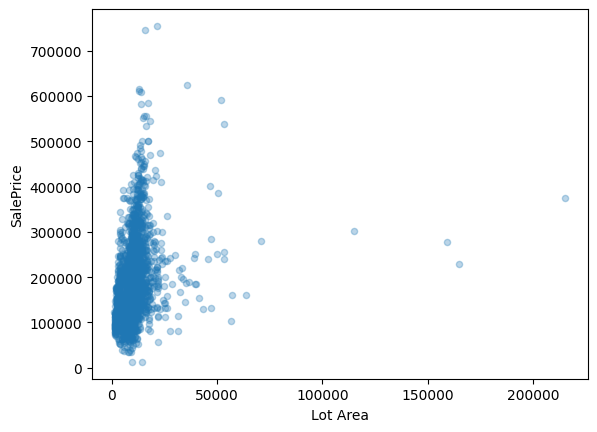

In [19]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_ames.plot.scatter(x="Lot Area", y="SalePrice", alpha=0.3)

In [25]:
df_ames["Lot Area"].corr(df_ames["SalePrice"])

0.2665492203284296

I would describe the relationship between these variables as somewhat positive. The correlation is 0.26, which is not very strong.

4\. Transform each of Lot Area and SalePrice so that their distributions are more symmetric. Make a scatterplot of the transformed variables. Compute the correlation. How would you describe the relationship?

In [20]:
import numpy as np

<Axes: xlabel='log_lot_area', ylabel='log_sale_price'>

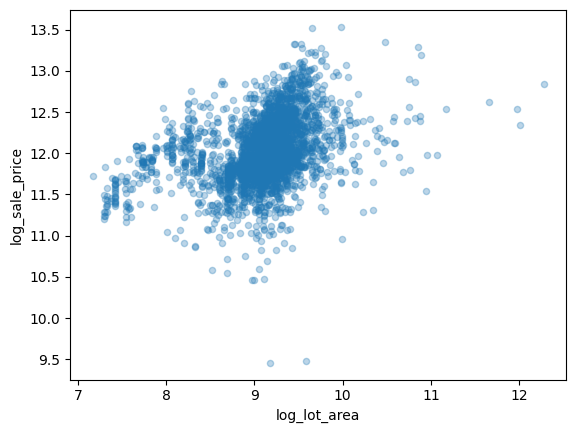

In [22]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_ames["log_lot_area"] = np.log(df_ames["Lot Area"])
df_ames["log_sale_price"] = np.log(df_ames["SalePrice"])
df_ames.plot.scatter(x="log_lot_area", y="log_sale_price", alpha=0.3)

In [23]:
df_ames["log_lot_area"].corr(df_ames["log_sale_price"])

0.3684939473481817

I would describe the relationship between the transformed variables as more positive. The correlation is 0.36 which is stronger than the correlation between the original variables.

5\. Do non-linear transformations (like log) affect the shape of the scatterplot? Do they affect the correlation?

**YOUR RESPONSE HERE.**

Yes a non-linear transformation does affect the shape and the correlation of the scatterplot. The scatterplot is more linear and the correlation is stronger.

6\. Consider only "Neighborhood", which is a categorical variable. Convert this variable to quantitative variables. How many new quantitative variables will you have? What is the value of the sum across each row of these new quantitative variables? What does the sum of the values in each new *column* represent?

In [34]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_ames_neighborhood = pd.get_dummies(df_ames[["Neighborhood"]])
df_ames_neighborhood

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df_ames_neighborhood.sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Length: 2930, dtype: int64

In [38]:
df_ames_neighborhood.sum(axis=0)

Neighborhood_Blmngtn     28
Neighborhood_Blueste     10
Neighborhood_BrDale      30
Neighborhood_BrkSide    108
Neighborhood_ClearCr     44
Neighborhood_CollgCr    267
Neighborhood_Crawfor    103
Neighborhood_Edwards    194
Neighborhood_Gilbert    165
Neighborhood_Greens       8
Neighborhood_GrnHill      2
Neighborhood_IDOTRR      93
Neighborhood_Landmrk      1
Neighborhood_MeadowV     37
Neighborhood_Mitchel    114
Neighborhood_NAmes      443
Neighborhood_NPkVill     23
Neighborhood_NWAmes     131
Neighborhood_NoRidge     71
Neighborhood_NridgHt    166
Neighborhood_OldTown    239
Neighborhood_SWISU       48
Neighborhood_Sawyer     151
Neighborhood_SawyerW    125
Neighborhood_Somerst    182
Neighborhood_StoneBr     51
Neighborhood_Timber      72
Neighborhood_Veenker     24
dtype: int64

The sum of the values in each new column represents the number of houses in each neighborhood.

## Earnings and Height

Now we'll revisit the earnings and height data

In [76]:
# Read in the data into a DataFrame called `df_workers`.
df_workers = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/Earnings_and_Height.csv")

df_workers

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,1,1,18168.84180,70,150,15
17866,1,44,1,12,2,4,1,84054.75000,74,230,15
17867,1,30,1,12,1,3,1,16081.58789,65,162,15
17868,1,46,3,12,4,4,1,84054.75000,68,190,15


1\. Make a scatterplot showing the relationship between years of education and earnings. Calculate the correlation coefficient.

<Axes: ylabel='Frequency'>

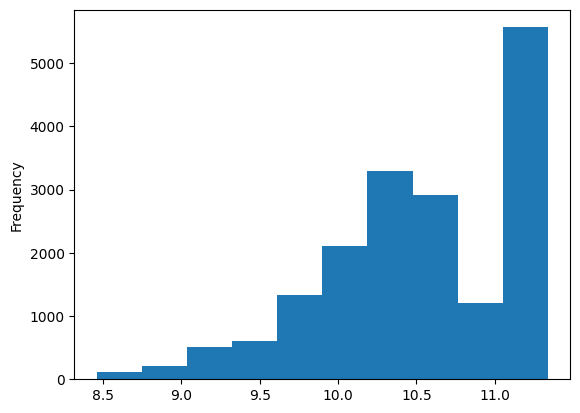

In [77]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_workers["log_earnings"] = np.log(df_workers["earnings"])
df_workers["log_earnings"].plot.hist()

<Axes: ylabel='Frequency'>

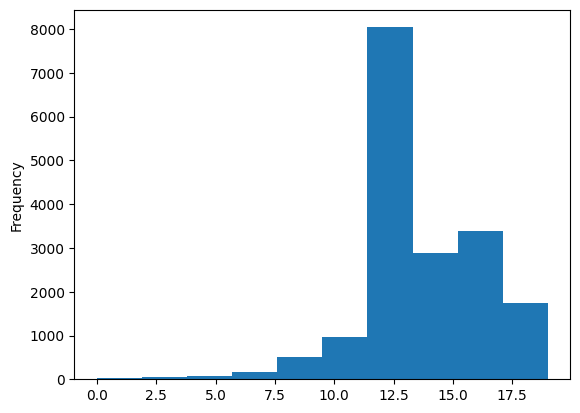

In [78]:
df_workers["educ"].plot.hist()

<Axes: xlabel='educ', ylabel='log_earnings'>

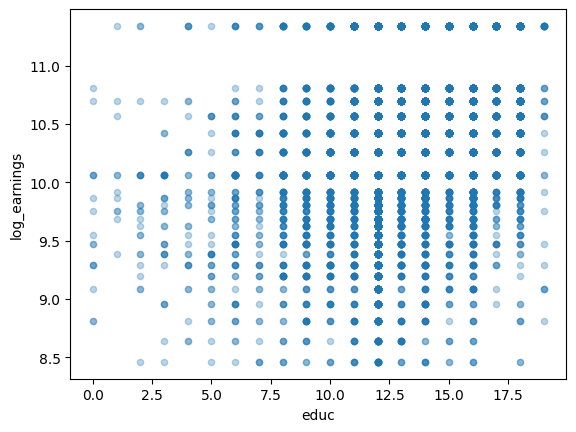

In [85]:
df_workers.plot.scatter(x="educ", y="log_earnings", alpha=0.3)

In [79]:
df_workers["log_earnings"].corr(df_workers["educ"])

0.39610854045953386

2\. Make a scatterplot showing the relationship between height and earnings. Calculate the correlation coefficient.

<Axes: ylabel='Frequency'>

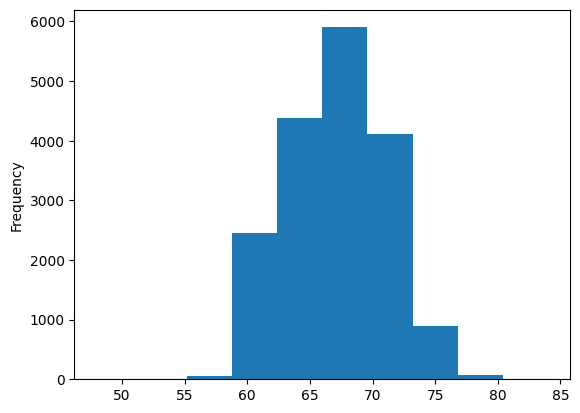

In [83]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_workers["height"].plot.hist()

<Axes: xlabel='height', ylabel='log_earnings'>

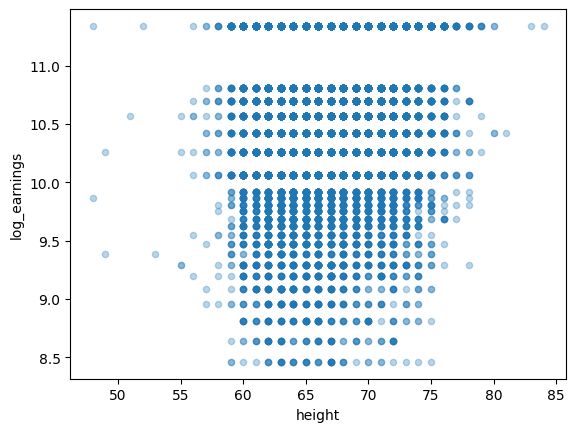

In [86]:
df_workers.plot.scatter(x="height", y="log_earnings", alpha=0.3)

In [84]:
df_workers["log_earnings"].corr(df_workers["height"])

0.11586942657219149

 3\. How does the relationship between height and earnings compare to the relationship between education and earnings?

The relationship between height and earnings is less strong than the relationship between education and earnings.

4\. If actual earnings were recorded, instead of being "binned" as they were, how would this affect the mean earnings? SD of earnings? Correlation between earnings and education?

**YOUR RESPONSE HERE.**

If the actual earnings were recorded, instead of binned as they were, the mean earnings would be higher, the SD of earnings would be higher, and the correlation between earnings and education would be higher.

## Penguins

The ["Palmer penguins"](https://allisonhorst.github.io/palmerpenguins/) data set (`penguins.csv`) contains data on a sample of penguins collected at Palmer Station in Antarctica.

In [87]:
df_penguins = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/penguins.csv")

df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


1\. Create a scatterplot of bill length and bill depth. Compute the correlation. Describe the relationship.

<Axes: ylabel='Frequency'>

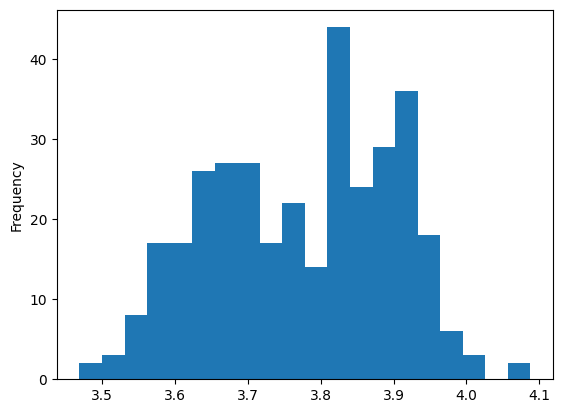

In [118]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# df_penguins["bill_length_mm"].plot.hist(bins=20)
df_penguins["log_bill_length_mm"] = np.log(df_penguins["bill_length_mm"])
df_penguins["log_bill_length_mm"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

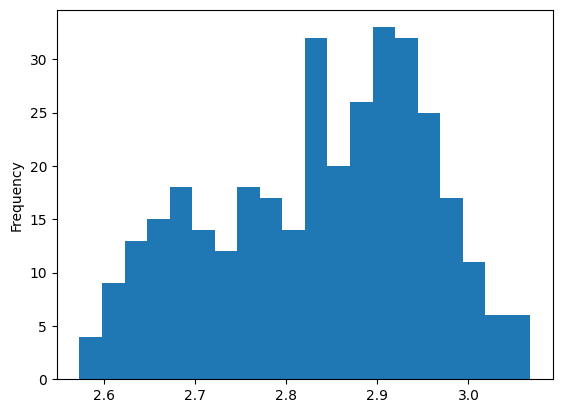

In [110]:
# df_penguins["bill_depth_mm"].plot.hist(bins=20)
df_penguins["log_bill_depth_mm"] = np.log(df_penguins["bill_depth_mm"])
df_penguins["log_bill_depth_mm"].plot.hist(bins=20)

<Axes: xlabel='log_bill_length_mm', ylabel='log_bill_depth_mm'>

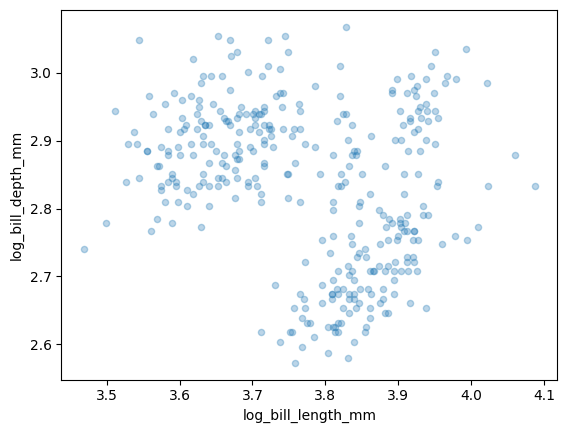

In [119]:
df_penguins.plot.scatter(x="log_bill_length_mm", y="log_bill_depth_mm", alpha=0.3)

In [120]:
df_penguins["log_bill_length_mm"].corr(df_penguins["log_bill_depth_mm"])

-0.2546592100608698

The relationship between bill depth and bill length is negative and somewhat weak. This means that the longer the bill length, the shorter the bill depth.

2\. Now consider only the penguins of species Adelie. Create a scatterplot of bill length and bill depth. Compute the correlation. Describe the relationship.

In [123]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_adelie = df_penguins[df_penguins["species"] == "Adelie"]
df_adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,log_bill_depth_mm,log_bill_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,2.928524,3.666122
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2.856470,3.676301
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,2.890372,3.696351
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,2.960105,3.602777
...,...,...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female,2009,2.912351,3.600048
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009,2.879198,3.583519
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009,2.895912,3.632309
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009,2.839078,3.583519


<Axes: xlabel='log_bill_length_mm', ylabel='log_bill_depth_mm'>

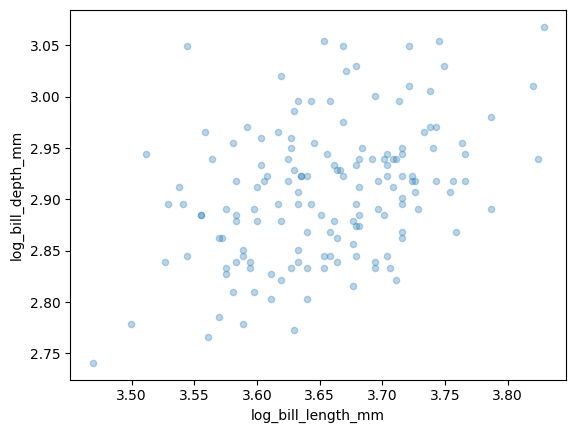

In [124]:
df_adelie.plot.scatter(x="log_bill_length_mm", y="log_bill_depth_mm", alpha=0.3)

In [125]:
df_adelie["log_bill_length_mm"].corr(df_adelie["log_bill_depth_mm"])

0.3959609799642817

The relationship between bill depth and bill length for the Adelie penguins is positive and somewhat weak. This means that the longer the bill length, the longer the bill depth.

3\. Now consider only the penguins of species Chinstrap. Create a scatterplot of bill length and bill depth. Compute the correlation. Describe the relationship.

In [126]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_chinstrap = df_penguins[df_penguins["species"] == "Chinstrap"]
df_chinstrap

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,log_bill_depth_mm,log_bill_length_mm
276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007,2.884801,3.839452
277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007,2.970414,3.912023
278,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007,2.954910,3.937691
279,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007,2.928524,3.815512
280,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007,2.985682,3.964615
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,2.985682,4.021774
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,2.895912,3.772761
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,2.901422,3.903991
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,2.944439,3.927896


<Axes: xlabel='log_bill_length_mm', ylabel='log_bill_depth_mm'>

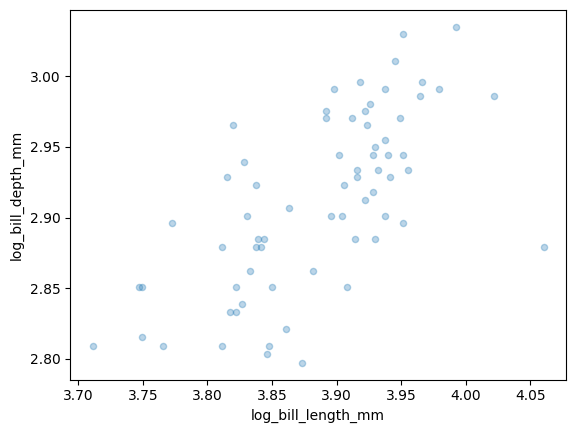

In [127]:
df_chinstrap.plot.scatter(x="log_bill_length_mm", y="log_bill_depth_mm", alpha=0.3)

In [128]:
df_chinstrap["log_bill_length_mm"].corr(df_chinstrap["log_bill_depth_mm"])

0.6596129707316652

The relationship between bill depth and bill length for the Chinstrap penguins is positive and strong. This means that the longer the bill length, the longer the bill depth.

4\. Now consider only the penguins of species Gentoo. Create a scatterplot of bill length and bill depth. Compute the correlation. Describe the relationship.

In [129]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_gentoo = df_penguins[df_penguins["species"] == "Gentoo"]
df_gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,log_bill_depth_mm,log_bill_length_mm
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007,2.580217,3.830813
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007,2.791165,3.912023
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007,2.646175,3.885679
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007,2.721295,3.912023
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007,2.674149,3.862833
...,...,...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009,NaN,NaN
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009,2.660260,3.845883
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009,2.753661,3.919991
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009,2.694627,3.811097


<Axes: xlabel='log_bill_length_mm', ylabel='log_bill_depth_mm'>

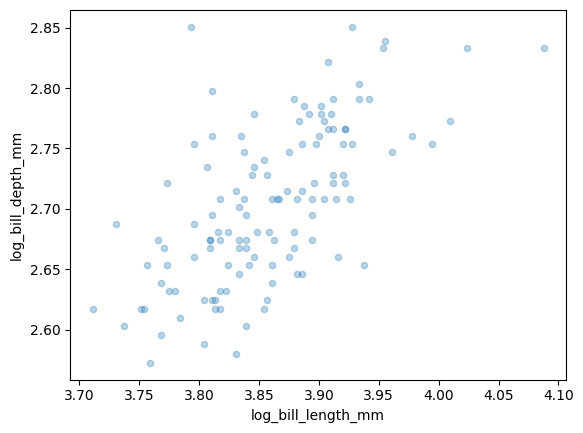

In [130]:
df_gentoo.plot.scatter(x="log_bill_length_mm", y="log_bill_depth_mm", alpha=0.3)

In [131]:
df_gentoo["log_bill_depth_mm"].corr(df_gentoo["log_bill_length_mm"])

0.6442125838588996

The relationship for the gentoo penguins is positive and strong. This means that the longer the bill length, the longer the bill depth.

5\. Compare your answer to part 1 with your answers to parts 2-4. What do you notice? Does this remind you of something we have seen previously?

The answer to 1 differ greatly to the answers to 2-4. This reminds me of the Simpson's paradox.

## Restaurant Tips Data

The file `tips.csv` is an older data set containing information about dining parties at a restaurant, including the amount of the tips paid to the waiter.

In [169]:
df_tips = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/tips.csv")

df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1\. Create a new column that stores the tip as a percentage of the total bill. Then summarize and describe this variable.

In [157]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_tips["tip_percent"] = 100 * df_tips["tip"] / df_tips["total_bill"]
df_tips

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


2\. Make a visualization that shows the distribution of the total bills (excluding tip).

<Axes: ylabel='Frequency'>

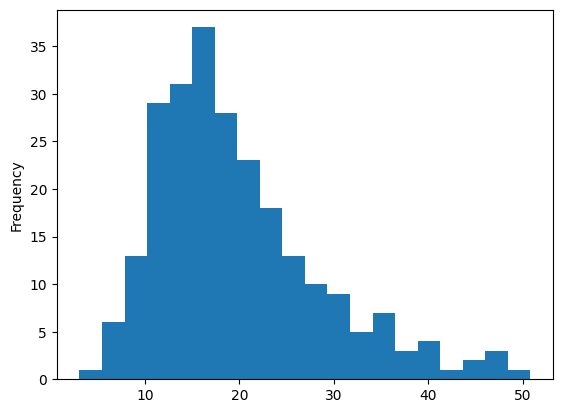

In [159]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_tips["total_bill"].plot.hist(bins=20)

3\. Transform the total bill variable so that it the distributon is approximately symmetric, and display it in a plot.

<Axes: ylabel='Frequency'>

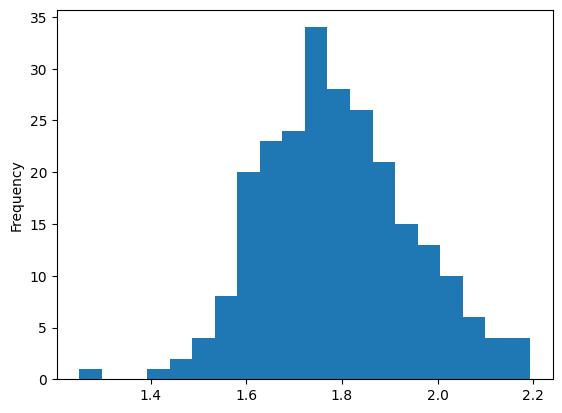

In [172]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# df_tips["total_bill"] = np.log(df_tips["total_bill"])
(df_tips["total_bill"] ** 0.2).plot.hist(bins=20)
# df_tips["total_bill"].plot.hist(bins=20)

4\. Suppose the total bill + tip are divided evenly among the people in each party. Which table paid the most _per person_?

In [175]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_tips["bill_per_person"] = (df_tips["total_bill"] + df_tips["tip"]) / df_tips["size"]
df_tips["bill_per_person"]

0       9.000
1       4.000
2       8.170
3      13.495
4       7.050
        ...  
239    11.650
240    14.590
241    12.335
242     9.785
243    10.890
Name: bill_per_person, Length: 244, dtype: float64

<Axes: ylabel='Frequency'>

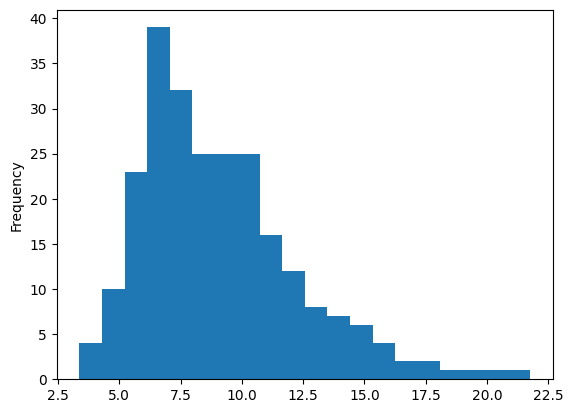

In [176]:
df_tips["bill_per_person"].plot.hist(bins=20)

In [177]:
df_tips["bill_per_person"].idxmax()

184

In [178]:
df_tips.iloc[df_tips["bill_per_person"].idxmax()]

total_bill          40.55
tip                   3.0
sex                  Male
smoker                Yes
day                   Sun
time               Dinner
size                    2
tips_per_person    21.775
bill_per_person    21.775
Name: 184, dtype: object

In [179]:
df_tips[df_tips["bill_per_person"] == df_tips["bill_per_person"].max()]

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,bill_per_person
184,40.55,3.0,Male,Yes,Sun,Dinner,2,21.775,21.775


5\. Summarize the relationship between the tip and the total bill.

<Axes: xlabel='total_bill', ylabel='tip'>

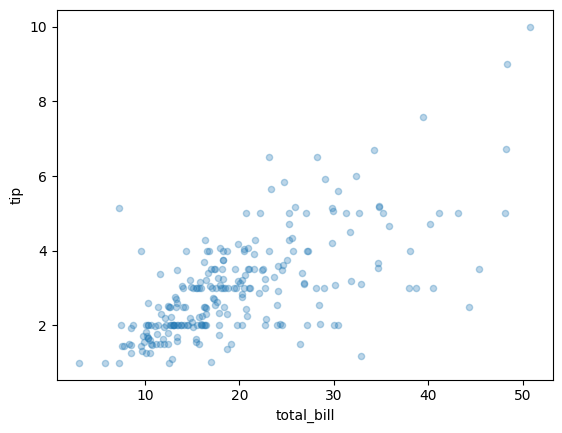

In [180]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_tips.plot.scatter(x="total_bill", y="tip", alpha=0.3)

In [181]:
df_tips["total_bill"].corr(df_tips["tip"])

0.6757341092113645

The relationship between the total bill and the tip is very positive and strong. This means that the higher the total bill, the higher the tip.

6\. Which pair of quantitative variables in this data set have the highest correlation with each other?

In [192]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_tips[["total_bill", "tip", "size", "tips_per_person", "bill_per_person"]].corr()

,total_bill,tip,size,tips_per_person,bill_per_person
total_bill,1.000000,0.675734,0.598315,0.625610,0.625610
tip,0.675734,1.000000,0.489299,0.419736,0.419736
size,0.598315,0.489299,1.000000,-0.198370,-0.198370
tips_per_person,0.625610,0.419736,-0.198370,1.000000,1.000000
bill_per_person,0.625610,0.419736,-0.198370,1.000000,1.000000


The pair of quantitative variables that have the highest correlation with each other would be the total bill and tip.